In [227]:
### Data Collection
import pandas_datareader as pdr
key="41eebfc4dc3bc3422af257e55f11eacfd2a67cbf"

In [311]:
df = pdr.get_data_tiingo('TSLA', api_key=key)

In [312]:
df.to_csv('Stock.csv')

In [313]:
import pandas as pd

In [314]:
df=pd.read_csv('Stock.csv')

In [315]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2016-02-16 00:00:00+00:00,155.17,162.95,154.11,158.70,5593794,31.034,32.590,30.822,31.740,27968970,0.0,1.0
1,TSLA,2016-02-17 00:00:00+00:00,168.68,169.34,156.68,159.00,5825159,33.736,33.868,31.336,31.800,29125795,0.0,1.0
2,TSLA,2016-02-18 00:00:00+00:00,166.77,172.95,164.77,172.42,3887574,33.354,34.590,32.954,34.484,19437870,0.0,1.0
3,TSLA,2016-02-19 00:00:00+00:00,166.58,167.49,162.50,163.66,2959390,33.316,33.498,32.500,32.732,14796950,0.0,1.0
4,TSLA,2016-02-22 00:00:00+00:00,177.74,178.91,169.85,170.12,5060051,35.548,35.782,33.970,34.024,25300255,0.0,1.0


In [316]:
df1=df.reset_index()['close']

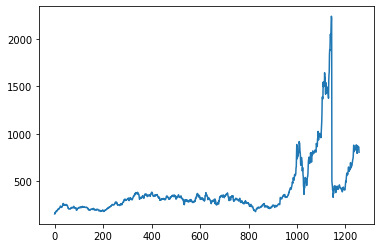

In [317]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [318]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
import numpy as np

df1

0       155.17
1       168.68
2       166.77
3       166.58
4       177.74
         ...  
1252    849.99
1253    852.23
1254    863.42
1255    849.46
1256    804.82
Name: close, Length: 1257, dtype: float64

In [319]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [320]:
print(df1)

[[0.        ]
 [0.00648403]
 [0.00556734]
 ...
 [0.33991975]
 [0.33321975]
 [0.31179508]]


In [321]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [322]:
training_size,test_size

(817, 440)

In [323]:
train_data

array([[0.        ],
       [0.00648403],
       [0.00556734],
       [0.00547615],
       [0.01083232],
       [0.01057795],
       [0.01143705],
       [0.01548297],
       [0.0168796 ],
       [0.01764271],
       [0.01496463],
       [0.01591972],
       [0.01947129],
       [0.02201499],
       [0.02405475],
       [0.0227637 ],
       [0.02570096],
       [0.02400196],
       [0.02511543],
       [0.02878699],
       [0.03031801],
       [0.03204101],
       [0.03417675],
       [0.03722919],
       [0.03990727],
       [0.03794911],
       [0.03235297],
       [0.03483428],
       [0.03603893],
       [0.03597654],
       [0.03442152],
       [0.03580376],
       [0.03955692],
       [0.04406838],
       [0.0481383 ],
       [0.05291374],
       [0.0489686 ],
       [0.04554661],
       [0.04547462],
       [0.04446674],
       [0.04768715],
       [0.04640571],
       [0.04767755],
       [0.04737519],
       [0.04425076],
       [0.04549861],
       [0.04469231],
       [0.047

In [324]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [325]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [326]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [327]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [328]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [329]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [330]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [331]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_25 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_26 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [332]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_25 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_26 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [333]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 258ms/step - loss: 0.0024 - val_loss: 0.0571
Epoch 2/100
12/12 [==============================] - 2s 177ms/step - loss: 5.1668e-04 - val_loss: 0.0411
Epoch 3/100
12/12 [==============================] - 2s 183ms/step - loss: 3.1553e-04 - val_loss: 0.0235
Epoch 4/100
12/12 [==============================] - 2s 179ms/step - loss: 1.9165e-04 - val_loss: 0.0172
Epoch 5/100
12/12 [==============================] - 2s 182ms/step - loss: 1.3105e-04 - val_loss: 0.0172
Epoch 6/100
12/12 [==============================] - 2s 175ms/step - loss: 1.0590e-04 - val_loss: 0.0170
Epoch 7/100
12/12 [==============================] - 2s 178ms/step - loss: 1.0637e-04 - val_loss: 0.0164
Epoch 8/100
12/12 [==============================] - 2s 177ms/step - loss: 1.1906e-04 - val_loss: 0.0163
Epoch 9/100
12/12 [==============================] - 2s 188ms/step - loss: 1.0579e-04 - val_loss: 0.0161
Epoch 10/100
12/12 [==============================] - 2s 18

In [334]:
import tensorflow as tf

In [335]:
tf.__version__

'2.4.1'

In [336]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [337]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [338]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

294.2251465910387

In [339]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

643.1543194496264

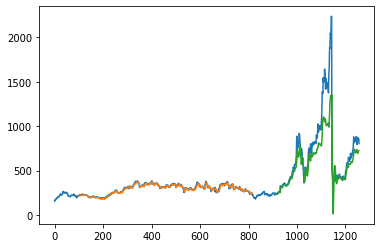

In [340]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [341]:
len(test_data)

440

In [342]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [343]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [344]:
temp_input

[0.13773409228347364,
 0.14120888086850517,
 0.1291335105923459,
 0.10807840351702361,
 0.11164438130525348,
 0.12102727037118804,
 0.1276792827729197,
 0.12665700381074882,
 0.13142763896754625,
 0.14061855076358962,
 0.12474682997533093,
 0.12982942819570165,
 0.12421409305138273,
 0.12964704978930497,
 0.1299446145576364,
 0.13382255540943955,
 0.13780608375968287,
 0.13989383656975016,
 0.146925004079517,
 0.14096410984939384,
 0.13654383321014793,
 0.13230113554555142,
 0.1280344407222185,
 0.12837040094452817,
 0.12988222194492174,
 0.12740571516332466,
 0.12723773505216981,
 0.12934948502097354,
 0.12039374538054695,
 0.12270227205098916,
 0.1117643670989355,
 0.11774925848779505,
 0.12897512934468558,
 0.12757369527447954,
 0.1357855229940775,
 0.13187878555179067,
 0.1277080793634034,
 0.12247669875886696,
 0.12572591405177627,
 0.12314861920348633,
 0.12158400445387268,
 0.12138722775223415,
 0.13747492296912048,
 0.15908676412712736,
 0.1651484464239434,
 0.16051219535606986

In [345]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.26692694]
101
1 day input [0.14120888 0.12913351 0.1080784  0.11164438 0.12102727 0.12767928
 0.126657   0.13142764 0.14061855 0.12474683 0.12982943 0.12421409
 0.12964705 0.12994461 0.13382256 0.13780608 0.13989384 0.146925
 0.14096411 0.13654383 0.13230114 0.12803444 0.1283704  0.12988222
 0.12740572 0.12723774 0.12934949 0.12039375 0.12270227 0.11176437
 0.11774926 0.12897513 0.1275737  0.13578552 0.13187879 0.12770808
 0.1224767  0.12572591 0.12314862 0.121584   0.12138723 0.13747492
 0.15908676 0.16514845 0.1605122  0.17598556 0.19207806 0.2010146
 0.20665873 0.19794296 0.20617879 0.19852849 0.2103159  0.21303238
 0.23353555 0.23743269 0.21564327 0.22648518 0.21828775 0.23260926
 0.22945123 0.22442143 0.24032195 0.25908772 0.23742309 0.23285403
 0.23556091 0.24313921 0.2440607  0.24516457 0.25898214 0.26420872
 0.27577535 0.27833824 0.28835466 0.31718005 0.34788681 0.31485232
 0.33321015 0.33559547 0.3310792  0.32203707 0.33086323 0.33369489
 0.3310744  0.33186631 0.34826117 0.

In [346]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [347]:
import matplotlib.pyplot as plt
len(df1)

1257

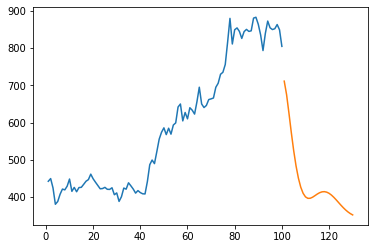

In [348]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

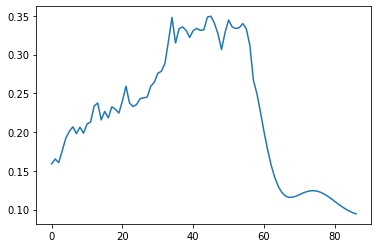

In [381]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [382]:
df3=scaler.inverse_transform(df3).tolist()

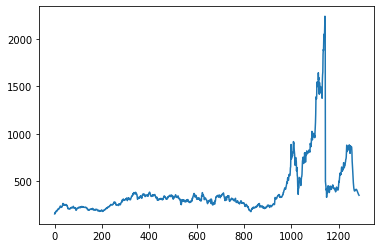

In [351]:
plt.plot(df3)